In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### Loading Data

In [2]:
#loading in csv
df = pd.read_csv('./dataset.csv')

In [3]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


### EDA

In [4]:
#check the shape of data
df.shape

(22000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [6]:
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


In [7]:
#check if any missing data
df.isnull().sum()

Text        0
language    0
dtype: int64

In [8]:
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

### Modeling

In [9]:
#import model libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
X = df['Text']
y = df['language']

In [11]:
#initialize class
count_vect = CountVectorizer()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
data_list = []

for text in X:
       
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        
        text = text.lower()
        data_list.append(text)

In [13]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(data_list).toarray()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy is :",ac)

Accuracy is : 0.9425568181818181


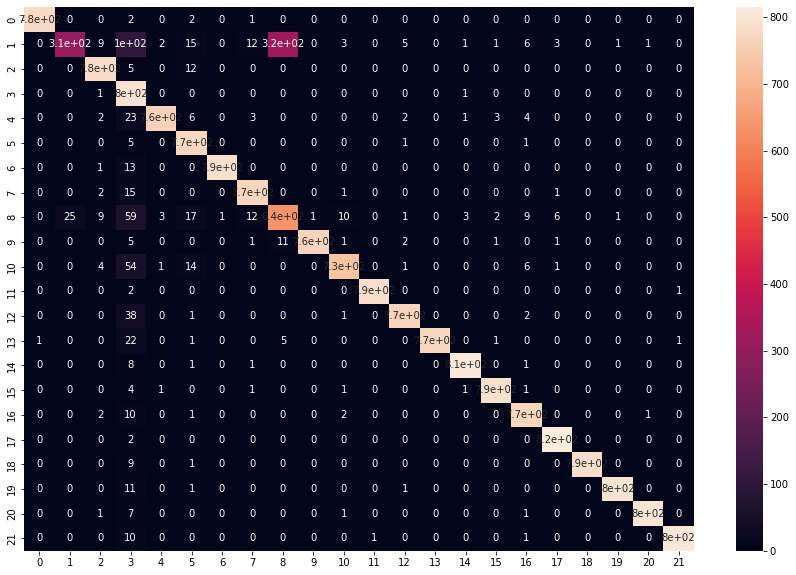

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Testing Model

In [18]:
def predict(text):
     x = count_vect.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = label_encoder.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in", lang[0])

In [19]:
predict("my name is")

The langauge is in English


In [20]:
predict("என் பெயர் ஜிசுன்")

The langauge is in Tamil


In [21]:
predict("내 이름은 zisun")

The langauge is in Korean


In [22]:
predict("меня зовут цисун")

The langauge is in French


In [23]:
predict("少年时代便离开了这个国家")

The langauge is in Chinese


In [24]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))